In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from scipy import stats
import numpy as np
import pandas as pd
import pydot
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from graphviz import Source
from sklearn import tree



Importing both the datasets

In [3]:

traffic_station_df = pd.read_csv("dot_traffic_stations_2015.txt",
                                 header=0, sep=',', quotechar='"')



traffic_df = pd.read_csv("dot_traffic_2015.txt",
                         header=0, sep=',', quotechar='"')


traffic_station_df.rename(columns = {"number_of_lanes_in_direction_indicated": "lane_count"}, inplace = True)

In [4]:
# Count unique lanes
unique_lanes = traffic_df['lane_of_travel'].nunique()
print(f"Number of unique lanes: {unique_lanes}")



Number of unique lanes: 10


# **CLEANING DATA - TRAFFIC DATA**

In [5]:
print('Traffic data:')
traffic_df.head()

Traffic data:


,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,...,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,...,89,122,124,110,69,73,28,12,6,15
1,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,9,...,1617,1669,1308,1068,928,885,798,650,613,15
2,2015-06-16,16,3,3,East,6,1U,Urban: Principal Arterial - Interstate,0,6,...,4244,4405,4609,4361,3272,2243,2050,1453,892,15
3,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,4,...,1011,959,851,708,559,457,297,207,110,15
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,...,83,61,55,35,29,21,23,9,7,15


In [6]:
traffic_df.columns


Index(['date', 'day_of_data', 'day_of_week', 'direction_of_travel',
       'direction_of_travel_name', 'fips_state_code',
       'functional_classification', 'functional_classification_name',
       'lane_of_travel', 'month_of_data', 'record_type', 'restrictions',
       'station_id', 'traffic_volume_counted_after_0000_to_0100',
       'traffic_volume_counted_after_0100_to_0200',
       'traffic_volume_counted_after_0200_to_0300',
       'traffic_volume_counted_after_0300_to_0400',
       'traffic_volume_counted_after_0400_to_0500',
       'traffic_volume_counted_after_0500_to_0600',
       'traffic_volume_counted_after_0600_to_0700',
       'traffic_volume_counted_after_0700_to_0800',
       'traffic_volume_counted_after_0800_to_0900',
       'traffic_volume_counted_after_0900_to_1000',
       'traffic_volume_counted_after_1000_to_1100',
       'traffic_volume_counted_after_1100_to_1200',
       'traffic_volume_counted_after_1200_to_1300',
       'traffic_volume_counted_after_1300_to_

We can see here that '**restrictions**' column is completely **empty** and therefore will be of no use to us.

In [7]:
traffic_df.isnull().mean()

date                                         0.0
day_of_data                                  0.0
day_of_week                                  0.0
direction_of_travel                          0.0
direction_of_travel_name                     0.0
fips_state_code                              0.0
functional_classification                    0.0
functional_classification_name               0.0
lane_of_travel                               0.0
month_of_data                                0.0
record_type                                  0.0
restrictions                                 1.0
station_id                                   0.0
traffic_volume_counted_after_0000_to_0100    0.0
traffic_volume_counted_after_0100_to_0200    0.0
traffic_volume_counted_after_0200_to_0300    0.0
traffic_volume_counted_after_0300_to_0400    0.0
traffic_volume_counted_after_0400_to_0500    0.0
traffic_volume_counted_after_0500_to_0600    0.0
traffic_volume_counted_after_0600_to_0700    0.0
traffic_volume_count

dropping **restrictions** column because it contains all values as null

In [8]:
# dropping restrictions column because it contains all values as null
traffic_df.dropna(how='all', axis=1, inplace=True)
traffic_df.reset_index(inplace=True, drop=True)

In [9]:
traffic_df.dtypes

date                                         object
day_of_data                                   int64
day_of_week                                   int64
direction_of_travel                           int64
direction_of_travel_name                     object
fips_state_code                               int64
functional_classification                    object
functional_classification_name               object
lane_of_travel                                int64
month_of_data                                 int64
record_type                                   int64
station_id                                   object
traffic_volume_counted_after_0000_to_0100     int64
traffic_volume_counted_after_0100_to_0200     int64
traffic_volume_counted_after_0200_to_0300     int64
traffic_volume_counted_after_0300_to_0400     int64
traffic_volume_counted_after_0400_to_0500     int64
traffic_volume_counted_after_0500_to_0600     int64
traffic_volume_counted_after_0600_to_0700     int64
traffic_volu

Changing the datatype of date column to datetime as the given datatype is not correct.

In [10]:
# Changing the datatype of date column to datetime as the given datatype is not correct.
traffic_df['date']= pd.to_datetime(traffic_df['date'], format='%Y-%m-%d')

In [11]:
traffic_df.dtypes

date                                         datetime64[ns]
day_of_data                                           int64
day_of_week                                           int64
direction_of_travel                                   int64
direction_of_travel_name                             object
fips_state_code                                       int64
functional_classification                            object
functional_classification_name                       object
lane_of_travel                                        int64
month_of_data                                         int64
record_type                                           int64
station_id                                           object
traffic_volume_counted_after_0000_to_0100             int64
traffic_volume_counted_after_0100_to_0200             int64
traffic_volume_counted_after_0200_to_0300             int64
traffic_volume_counted_after_0300_to_0400             int64
traffic_volume_counted_after_0400_to_050

# **CLEANING DATA - STATION DATA**

In [12]:
# view top of station dataframe
print('Traffic Station data:')
traffic_station_df.head()

Traffic Station data:


,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,...,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
0,NaN,NaN,NaN,NaN,13,3,091,7,West,59,...,Station not used for Heavy Vehicle Travel Info...,N,NaN,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,0,97
1,NaN,NaN,NaN,NaN,13,3,099,5,South,77,...,Station not used for Heavy Vehicle Travel Info...,N,NaN,100190,LITTLE JOHN CREEK SJ9912.526,L,Inductance loop,15,0,97
2,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,005,1,North,93,...,Station used for Heavy Vehicle Travel Informat...,N,NaN,022940,EDGEWOOD SIS5R22.999,P,Piezoelectric,15,0,69
3,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,NaN,5,South,35,...,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,000302,I 15 12900 South M.P. 290.6,X,Radio wave,15,0,11
4,G,Axle spacing with Scheme F modified,0,NaN,14,1,000000,7,West,27,...,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,W01136,E. of Franklin Rd Underpass,L,Inductance loop,15,0,95


In [13]:
traffic_station_df.isnull().sum()


algorithm_of_vehicle_classification                  9890
algorithm_of_vehicle_classification_name            11131
calibration_of_weighing_system                      20301
calibration_of_weighing_system_name                 21785
classification_system_for_vehicle_classification        0
concurrent_route_signing                                0
concurrent_signed_route_number                      14874
direction_of_travel                                     0
direction_of_travel_name                                0
fips_county_code                                        0
fips_state_code                                         0
functional_classification                               0
functional_classification_name                          0
hpms_sample_identifier                              15248
hpms_sample_type                                        0
lane_of_travel                                          0
lane_of_travel_name                                     0
latitude      

Here we are trying to observe the dataset so that we can clean it more efficiently

In [14]:
# we are dropping the columns with more than 60% NULL values as they will not be able to contribute in the dataset and will reduce the model accuracy
traffic_station_df.drop(['concurrent_signed_route_number', 'hpms_sample_identifier', 
                         'lrs_identification', 'lrs_location_point', 
                         'shrp_site_identification'], axis = 1, inplace=True)

# here we are only dropping the rows which contains the null values in 'latitude', 'longitude', 'station_location' because they contain 
# significatly less null values and are useful columns.
traffic_station_df.dropna(subset=['latitude', 'longitude', 'station_location'], inplace=True)
traffic_station_df.reset_index(inplace=True, drop=True)

In [15]:
print('Traffic_Station_Null_Mean: \n')
print(traffic_station_df.isnull().mean(), end = '\n\n')

print('Traffic_Station_Shape: \n')
print(traffic_station_df.shape, end = '\n\n')

Traffic_Station_Null_Mean: 

algorithm_of_vehicle_classification                 0.347580
algorithm_of_vehicle_classification_name            0.390847
calibration_of_weighing_system                      0.713170
calibration_of_weighing_system_name                 0.764985
classification_system_for_vehicle_classification    0.000000
concurrent_route_signing                            0.000000
direction_of_travel                                 0.000000
direction_of_travel_name                            0.000000
fips_county_code                                    0.000000
fips_state_code                                     0.000000
functional_classification                           0.000000
functional_classification_name                      0.000000
hpms_sample_type                                    0.000000
lane_of_travel                                      0.000000
lane_of_travel_name                                 0.000000
latitude                                            0.00

# **EDA - TRAFFIC DATA**    (Feature Engineering)


In [16]:
variables = ['traffic_volume_counted_after_0000_to_0100', 'traffic_volume_counted_after_0100_to_0200', 'traffic_volume_counted_after_0200_to_0300',
            'traffic_volume_counted_after_0300_to_0400', 'traffic_volume_counted_after_0400_to_0500', 'traffic_volume_counted_after_0500_to_0600',
             'traffic_volume_counted_after_0600_to_0700', 'traffic_volume_counted_after_0700_to_0800', 'traffic_volume_counted_after_0800_to_0900',
             'traffic_volume_counted_after_0900_to_1000', 'traffic_volume_counted_after_1000_to_1100', 'traffic_volume_counted_after_1100_to_1200',
             'traffic_volume_counted_after_1200_to_1300', 'traffic_volume_counted_after_1300_to_1400', 'traffic_volume_counted_after_1400_to_1500',
             'traffic_volume_counted_after_1500_to_1600', 'traffic_volume_counted_after_1600_to_1700', 'traffic_volume_counted_after_1700_to_1800',
             'traffic_volume_counted_after_1800_to_1900', 'traffic_volume_counted_after_1900_to_2000', 'traffic_volume_counted_after_2000_to_2100',
             'traffic_volume_counted_after_2100_to_2200', 'traffic_volume_counted_after_2200_to_2300', 'traffic_volume_counted_after_2300_to_2400']

# we will be starting by correcting the datatype of all the time-slots that are given to us, so that we will be able to sum them up very easily.
traffic_df[variables] = traffic_df[variables].astype(float).astype(int)

Here we are merging the time-slots in the **bucket of 4 hours** so that instead of dealing with 24 hours we will only have to deal with more accurate and less data.

In [17]:
till_4 = ['traffic_volume_counted_after_0000_to_0100', 'traffic_volume_counted_after_0100_to_0200', 'traffic_volume_counted_after_0200_to_0300',
         'traffic_volume_counted_after_0300_to_0400']
till_8 = ['traffic_volume_counted_after_0400_to_0500', 'traffic_volume_counted_after_0500_to_0600','traffic_volume_counted_after_0600_to_0700',
         'traffic_volume_counted_after_0700_to_0800']
till_12 = ['traffic_volume_counted_after_0800_to_0900','traffic_volume_counted_after_0900_to_1000', 'traffic_volume_counted_after_1000_to_1100',
          'traffic_volume_counted_after_1100_to_1200']
till_16 = ['traffic_volume_counted_after_1200_to_1300', 'traffic_volume_counted_after_1300_to_1400', 'traffic_volume_counted_after_1400_to_1500',
            'traffic_volume_counted_after_1500_to_1600']
till_20 = ['traffic_volume_counted_after_1600_to_1700', 'traffic_volume_counted_after_1700_to_1800','traffic_volume_counted_after_1800_to_1900',
           'traffic_volume_counted_after_1900_to_2000']
till_24 = ['traffic_volume_counted_after_2000_to_2100','traffic_volume_counted_after_2100_to_2200', 'traffic_volume_counted_after_2200_to_2300',
           'traffic_volume_counted_after_2300_to_2400']

# Here we are summing up the data of 4 hours and creating the new column with the new data that we have got after summing up.
traffic_df['1_to_4'] = traffic_df[till_4].sum(axis=1, numeric_only= True)
traffic_df['5_to_8'] = traffic_df[till_8].sum(axis=1, numeric_only= True)
traffic_df['9_to_12'] = traffic_df[till_12].sum(axis=1, numeric_only= True)
traffic_df['13_to_16'] = traffic_df[till_16].sum(axis=1, numeric_only= True)
traffic_df['17_to_20'] = traffic_df[till_20].sum(axis=1, numeric_only= True)
traffic_df['21_to_24'] = traffic_df[till_24].sum(axis=1, numeric_only= True)

# here we are dropping the columns named 'year_of_data', 'record_type' because they have only one value throughout the data which will affect our model accuracy.
traffic_df.drop(variables, axis = 1, inplace=True)
traffic_df.drop(['year_of_data', 'record_type'], axis = 1, inplace=True)
traffic_df.head()

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,station_id,1_to_4,5_to_8,9_to_12,13_to_16,17_to_20,21_to_24
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,000084,13,381,581,523,425,119
1,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,9,056P94,1045,1700,4325,5829,4973,2946
2,2015-06-16,16,3,3,East,6,1U,Urban: Principal Arterial - Interstate,0,6,077590,1685,12487,18061,16324,16647,6638
3,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,4,450001,312,811,3021,4057,3077,1071
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,102210,15,80,310,356,180,60


After creating bucket of 4 hours, here i am dividing the value of every **bucket by 4** so that out values does not explode and we only get the data of each hour relatively.

In [18]:
traffic_df['1_to_4'] = traffic_df['1_to_4'].div(4)
traffic_df['5_to_8'] = traffic_df['5_to_8'].div(4)
traffic_df['9_to_12'] = traffic_df['9_to_12'].div(4)
traffic_df['13_to_16'] = traffic_df['13_to_16'].div(4)
traffic_df['17_to_20'] = traffic_df['17_to_20'].div(4)
traffic_df['21_to_24'] = traffic_df['21_to_24'].div(4)
traffic_df.head()

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,station_id,1_to_4,5_to_8,9_to_12,13_to_16,17_to_20,21_to_24
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,000084,3.25,95.25,145.25,130.75,106.25,29.75
1,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,9,056P94,261.25,425.00,1081.25,1457.25,1243.25,736.50
2,2015-06-16,16,3,3,East,6,1U,Urban: Principal Arterial - Interstate,0,6,077590,421.25,3121.75,4515.25,4081.00,4161.75,1659.50
3,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,4,450001,78.00,202.75,755.25,1014.25,769.25,267.75
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,102210,3.75,20.00,77.50,89.00,45.00,15.00


From the below **boxplot**'s we can clearly see that there exists some **outliers in the dataset**. Therefore now we will be working on removing the outliers present in the data. 

> 1.   In statistics, an outlier is an observation point that is distant from other observations.
> 2.   In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

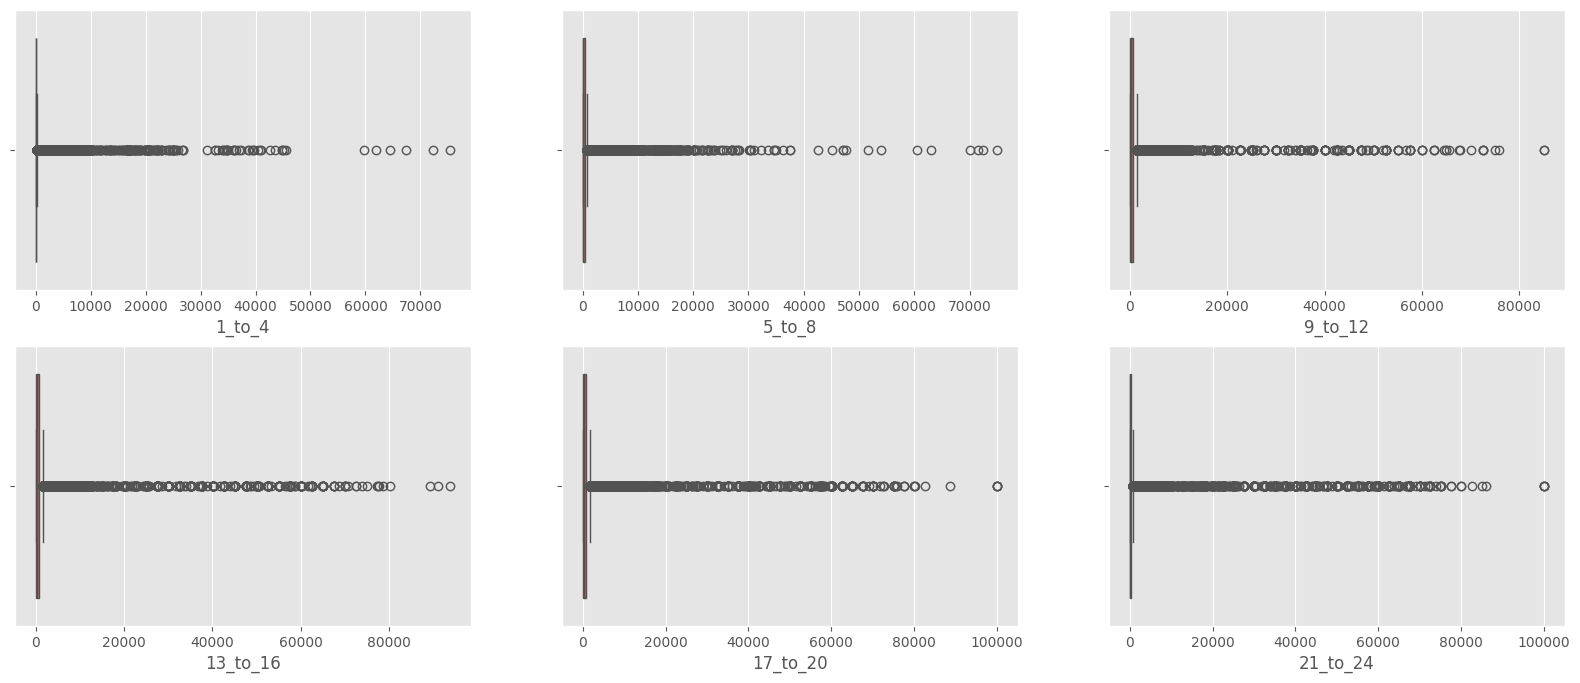

In [19]:
timings=['1_to_4','5_to_8', '9_to_12', '13_to_16', '17_to_20', '21_to_24']
plt.figure(figsize = (20,8))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.boxplot(x=traffic_df[timings[i-1]])

For more detailed look we can see that **between hour 1 and 4** there exists many **outliers** and most of them are **above 3000 range**.

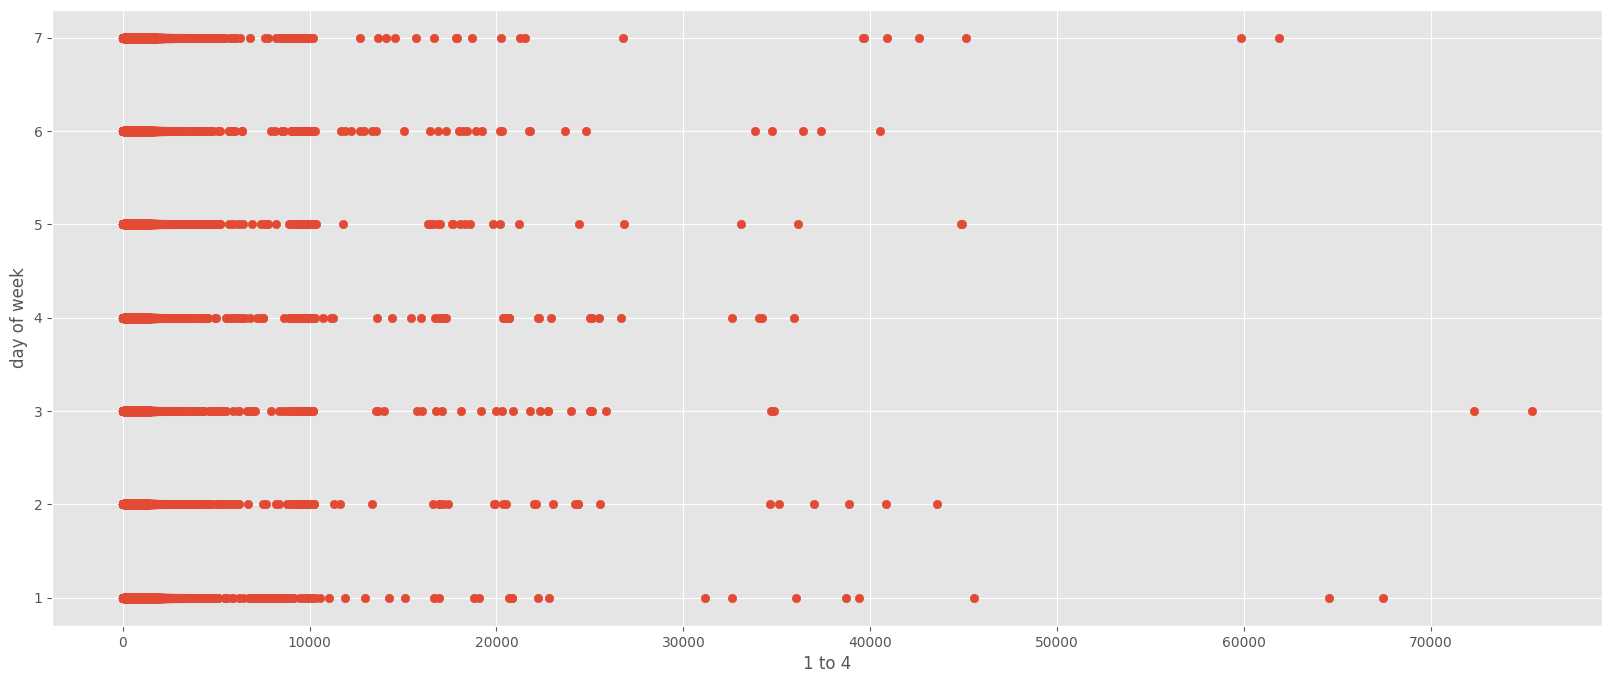

In [20]:
# For more detailed look we can see that between hour 1 and 4 there exists many outliers and most of them are above 3000 range.

fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(traffic_df['1_to_4'], traffic_df['day_of_week'])
ax.set_xlabel('1 to 4')
ax.set_ylabel('day of week')
plt.show()

Here we have used **Z-Score** to detect all the outliers present in the dataset.

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

**how does this help in identifying the outliers?**

> While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

We will use Z-score function defined in scipy library to detect the outliers.

1.   The **Z-score** is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

*I have taken the reference from [this article](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba) while detecting the outliers and removing them using Z-Score method.*

In [21]:
timings=['1_to_4','5_to_8', '9_to_12', '13_to_16', '17_to_20', '21_to_24']
z = np.abs(stats.zscore(traffic_df[timings]))
print(z)
threshold = 3
print(np.where(z > 3))

           1_to_4    5_to_8   9_to_12  13_to_16  17_to_20  21_to_24
0        0.358161  0.383019  0.490278  0.539823  0.529487  0.369380
1        0.808870  0.122992  0.555000  0.738117  0.562474  0.642094
2        1.532610  4.261234  4.389921  3.265818  3.365364  1.963056
3        0.020038  0.218057  0.190940  0.311335  0.107250  0.028763
4        0.355899  0.498493  0.565938  0.580044  0.588310  0.390490
...           ...       ...       ...       ...       ...       ...
7140386  0.354768  0.514221  0.598324  0.600275  0.584469  0.396930
7140387  0.319712  0.088390  0.166421  0.015496  0.049627  0.237713
7140388  0.093046  0.259565  0.080940  0.021036  0.149894  0.111055
7140389  2.074285  7.203694  6.020935  5.271119  4.729114  2.944833
7140390  0.334413  0.414477  0.514009  0.539823  0.460339  0.340041

[7140391 rows x 6 columns]
(array([      2,       2,       2, ..., 7140389, 7140389, 7140389]), array([1, 2, 3, ..., 2, 3, 4]))


In the below cell we are taking only the values which are between the range of **-3 to 3 in Z-Score**.

All other values are outliers.

In [22]:
traffic_df[timings] = traffic_df[timings][(z < 3).all(axis=1)]
traffic_df[timings] = traffic_df[timings][(-3 < z).all(axis=1)]


In [23]:
# Drop rows with any NaN values
traffic_df.dropna(axis=0, how='any', inplace=True) 

Now when we are running the boxplot again we can clearly see that all the outliers that were present in the dataset have been removed.

Hence we have now obtained a consistent and good performing dataset.

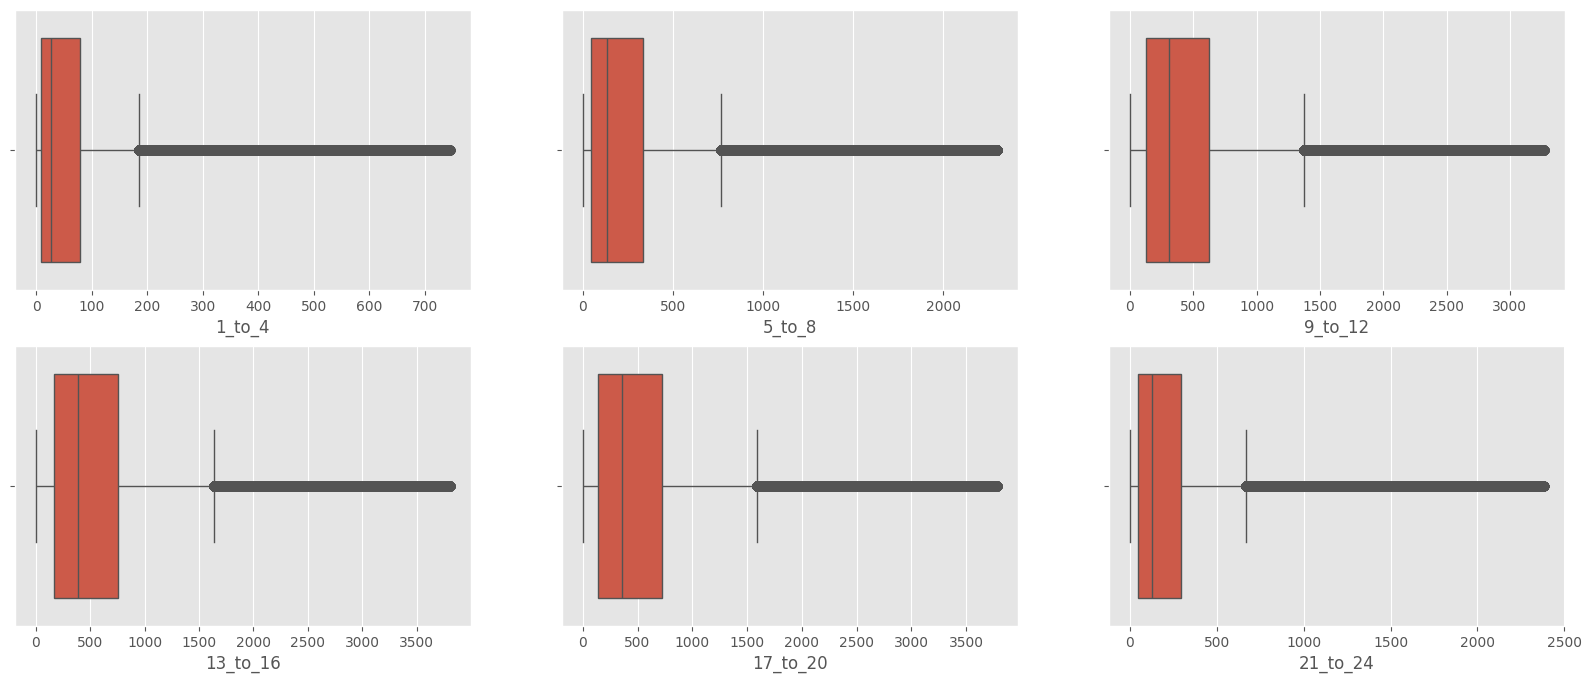

In [24]:
timings=['1_to_4','5_to_8', '9_to_12', '13_to_16', '17_to_20', '21_to_24']
plt.figure(figsize = (20,8))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.boxplot(x=traffic_df[timings[i-1]])

We can also see from the below cell output that the** data consistency have been improved in all the time bucket sections** where we have appied the **Z-Score method** and there is nearly no visible difference between the **mean, 75%, and maximum** value of the dataset.

In [25]:
traffic_df.describe()

,date,day_of_data,day_of_week,direction_of_travel,fips_state_code,lane_of_travel,month_of_data,1_to_4,5_to_8,9_to_12,13_to_16,17_to_20,21_to_24
count,6901954,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06
mean,2015-07-01 19:04:37.141342208,1.572624e+01,4.012449e+00,3.885063e+00,2.985262e+01,1.335427e+00,6.518998e+00,6.073193e+01,2.552298e+02,4.552350e+02,5.455916e+02,5.171385e+02,2.138846e+02
min,2015-01-01 00:00:00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,2015-04-02 00:00:00,8.000000e+00,2.000000e+00,1.000000e+00,1.300000e+01,1.000000e+00,4.000000e+00,9.000000e+00,4.700000e+01,1.282500e+02,1.640000e+02,1.435000e+02,4.500000e+01
50%,2015-07-01 00:00:00,1.600000e+01,4.000000e+00,5.000000e+00,3.000000e+01,1.000000e+00,7.000000e+00,2.700000e+01,1.355000e+02,3.105000e+02,3.905000e+02,3.545000e+02,1.267500e+02
75%,2015-10-02 00:00:00,2.300000e+01,6.000000e+00,5.000000e+00,4.400000e+01,2.000000e+00,1.000000e+01,7.975000e+01,3.357500e+02,6.277500e+02,7.545000e+02,7.207500e+02,2.940000e+02
max,2015-12-31 00:00:00,3.100000e+01,7.000000e+00,9.000000e+00,5.600000e+01,9.000000e+00,1.200000e+01,7.455000e+02,2.299750e+03,3.270500e+03,3.805000e+03,3.781250e+03,2.383750e+03
std,NaN,8.770013e+00,2.000232e+00,2.281844e+00,1.657622e+01,1.071629e+00,3.456660e+00,8.323963e+01,3.154451e+02,4.602179e+02,5.339154e+02,5.242792e+02,2.468112e+02


## **Pattern 1**

On the basis of below bar plot between **Traffic count and Days of weeks** across all time frames we can conclude that:

- The **maximum amout of Traffic occurs on Day 6 i.e saturday around the hours of 12 to 16 i.e. Afternoon Hours**.
- Also the traffic on other days is almost similar and the **minimum amount of traffic occurs during eary morning hours between 1 to 4**.

In [27]:
# We are renaming the very long direction name in this code cell

traffic_df["direction_of_travel_name"].replace({"North-South or Northeast-Southwest combined (ATR stations only)": "Northeast-Southwest", 
                                                "East-West or Southeast-Northwest combined (ATR stations only)": "Southeast-Northwest"}, inplace=True)

C:\Users\Talha\AppData\Local\Temp\ipykernel_3956\2547733686.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traffic_df["direction_of_travel_name"].replace({"North-South or Northeast-Southwest combined (ATR stations only)": "Northeast-Southwest",


The below code cell helps us to observe the data more vividly and understand it better.

In [28]:
print('functional classification:'.upper())
print(dict(traffic_df['functional_classification'].value_counts()), end = '\n\n')

print('functional classification name:'.upper())
print(dict(traffic_df['functional_classification_name'].value_counts()), end = '\n\n')


print('fips state code:'.upper())
print(dict(traffic_df['fips_state_code'].value_counts()), end = '\n\n')


print('direction of travel:'.upper())
print(dict(traffic_df['direction_of_travel'].value_counts()), end = '\n\n')


print('direction of travel name:'.upper())
print(dict(traffic_df['direction_of_travel_name'].value_counts()), end = '\n\n')

FUNCTIONAL CLASSIFICATION:
{'1U': np.int64(1548157), '3R': np.int64(1392830), '3U': np.int64(1108945), '1R': np.int64(992054), '2U': np.int64(604921), '4R': np.int64(485936), '5R': np.int64(319145), '4U': np.int64(314540), '5U': np.int64(79926), '6R': np.int64(37096), '7U': np.int64(10688), '7R': np.int64(7716)}

FUNCTIONAL CLASSIFICATION NAME:
{'Urban: Principal Arterial - Interstate': np.int64(1548157), 'Rural: Principal Arterial - Other': np.int64(1392830), 'Urban: Principal Arterial - Other': np.int64(1108945), 'Rural: Principal Arterial - Interstate': np.int64(992054), 'Urban: Principal Arterial - Other Freeways or Expressways': np.int64(604921), 'Rural: Minor Arterial': np.int64(485936), 'Rural: Major Collector': np.int64(319145), 'Urban: Minor Arterial': np.int64(314540), 'Urban: Collector': np.int64(79926), 'Rural: Minor Collector': np.int64(37096), 'Urban: Local System': np.int64(10688), 'Rural: Local System': np.int64(7716)}

FIPS STATE CODE:
{12: np.int64(606214), 39: np.int

In The below code cell i have created a function so that i can create a dictionary for the appropriate Feature to match with its Feature name.

Example: Direction and Direction name can be matched, Functional Classification and Functional Classification name can be matched together.

In [29]:
def columnWithName(dict1, dict2):
    ans = {}
    for k, v in dict1.items():
        for k1, v1 in dict2.items():
            if v == v1:
                ans[k] = k1
    return ans

In the below code cell i am making use of the above created function to match the Features with its namings.

In [30]:
functional_classification1 = dict(traffic_df['functional_classification'].value_counts())
functional_classification_name1 = dict(traffic_df['functional_classification_name'].value_counts())
functional_classification_dict = columnWithName(functional_classification1, functional_classification_name1)


direction_of_travel1 = dict(traffic_df['direction_of_travel'].value_counts())
direction_of_travel_name1 = dict(traffic_df['direction_of_travel_name'].value_counts())
direction_of_travel_dict = columnWithName(direction_of_travel1, direction_of_travel_name1)

## **Pattern 2**

In the below Bar plot we have created the Graph between **Direction of travel and The traffic count** on Diferrent days across all time Frames.

1. With this we can Easily conclude that **Northeast-Southwest Direction have the maximum amount of traffic specially on Hours 1 to 4, 4 to 8 i.e. early mornings and at Late nights between hours 20 to 24**.

2. We can also conclude that **The traffic on time range 8 to 12 is extremely less irrespective of Direction of travel**.

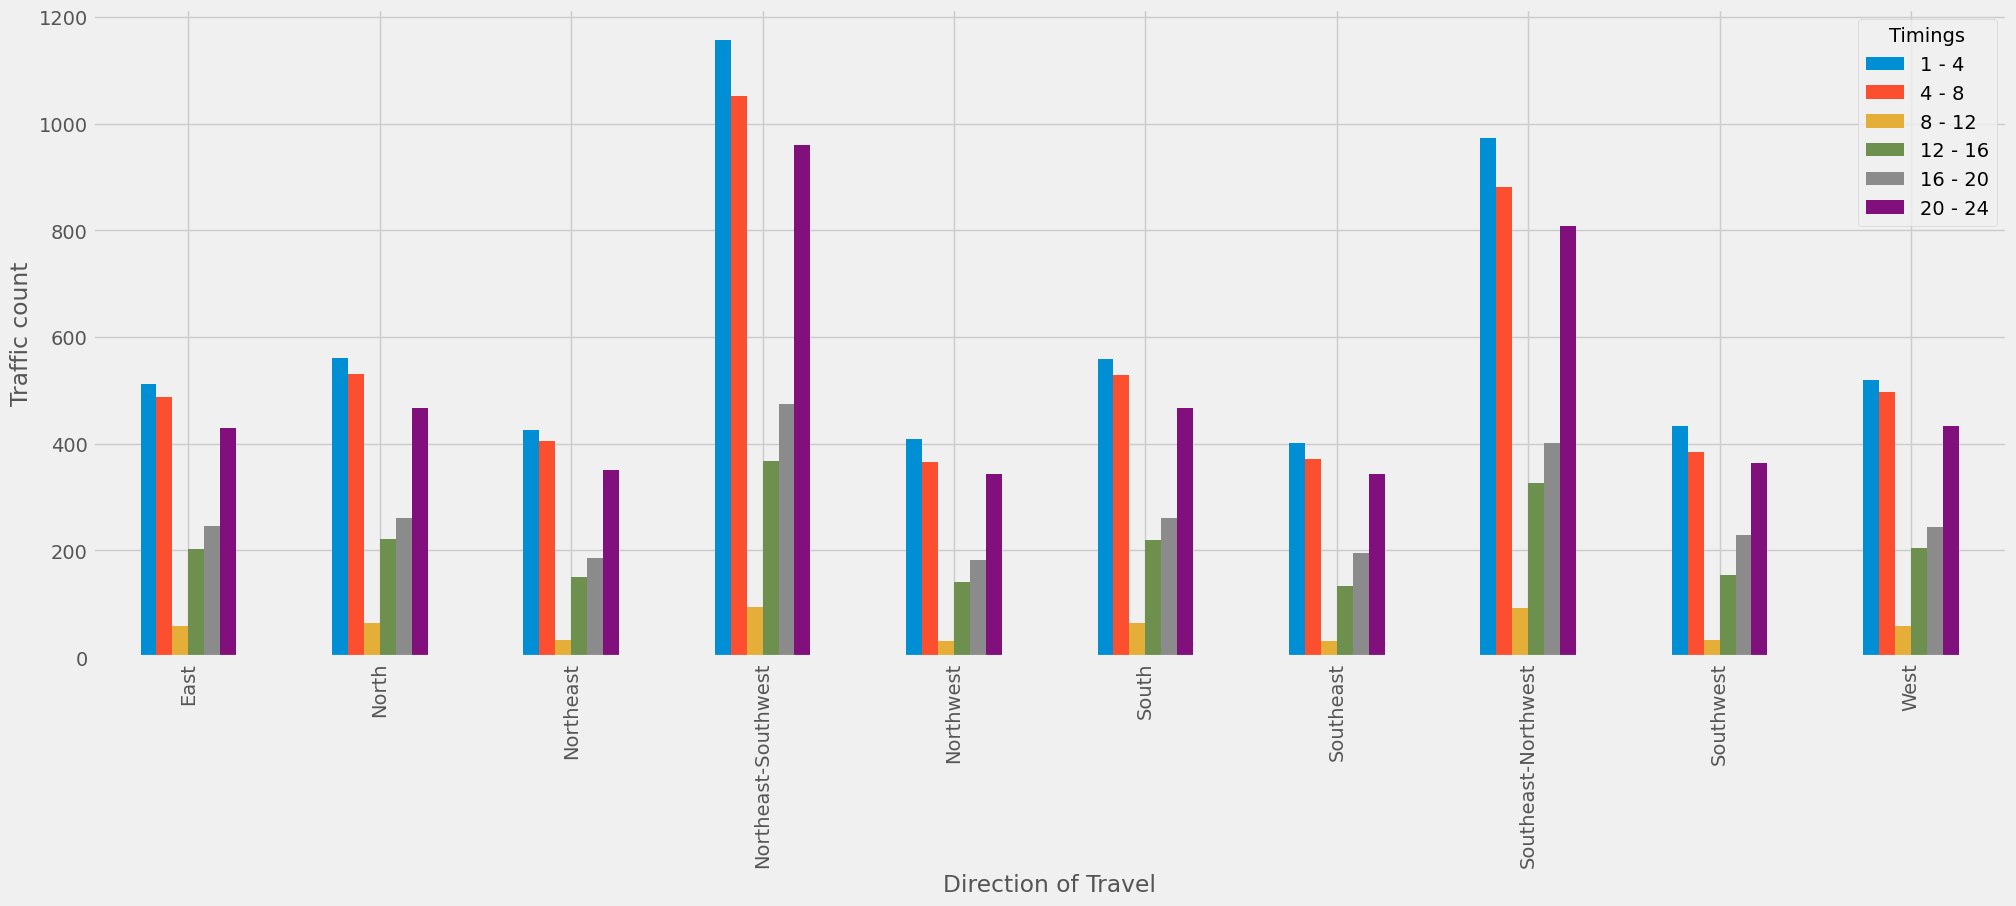

In [31]:
legends=['1 - 4','4 - 8', '8 - 12', '12 - 16', '16 - 20', '20 - 24']
direction_EDA = pd.pivot_table(data=traffic_df, index=['direction_of_travel_name'], values=timings)
direction_EDA.plot(kind='bar', figsize=(22,8), xlabel = 'Direction of Travel', ylabel = 'Traffic count')
plt.style.use('fivethirtyeight')
plt.legend(title='Timings', labels=legends)

We can also conclude on the basis of the below density graph that **highest density of traffic is in Direction number 1 and 5 i.e. North and South across all the times included.**

**More Proof for Pattern 2**

C:\Users\Talha\AppData\Local\Temp\ipykernel_3956\2515337717.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traffic_df['direction_of_travel'],color='red')


<Axes: xlabel='direction_of_travel', ylabel='Density'>

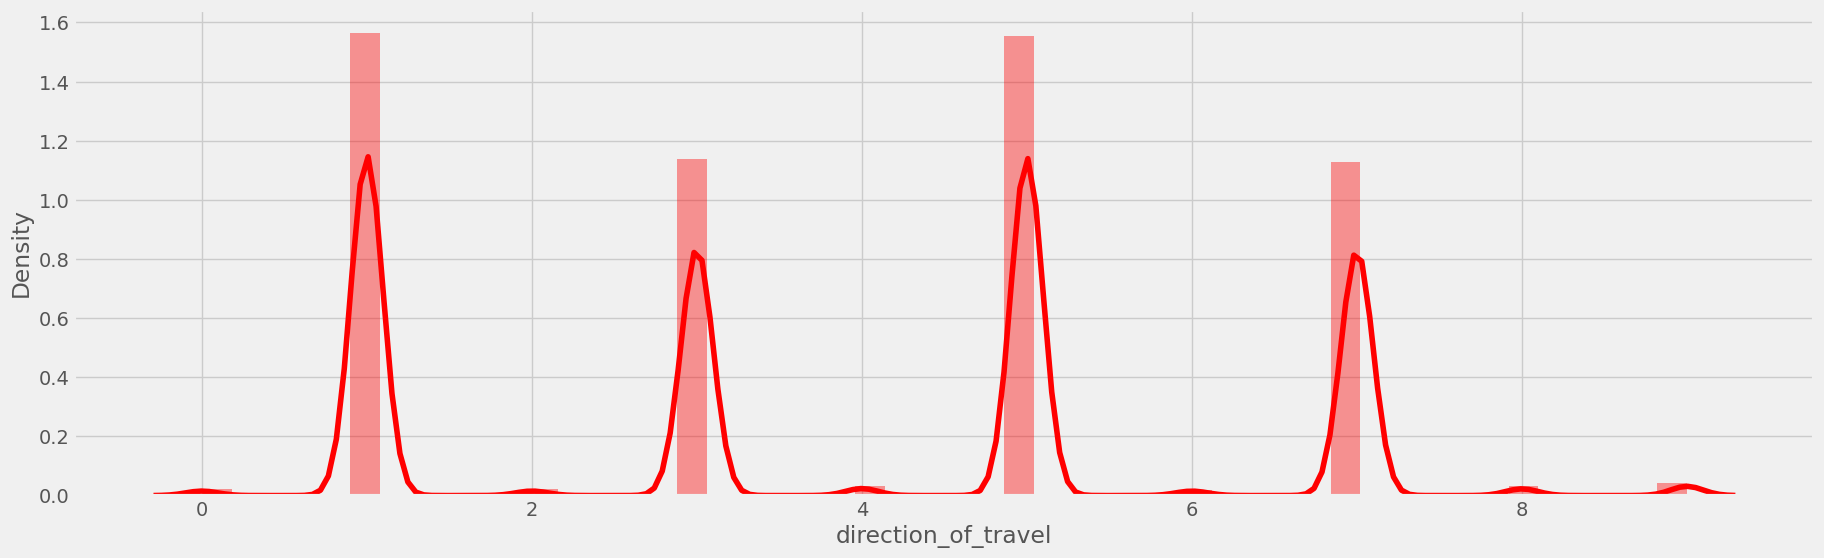

In [32]:
plt.figure(figsize=(20,6))
plt.figure(1)

sns.distplot(traffic_df['direction_of_travel'],color='red')

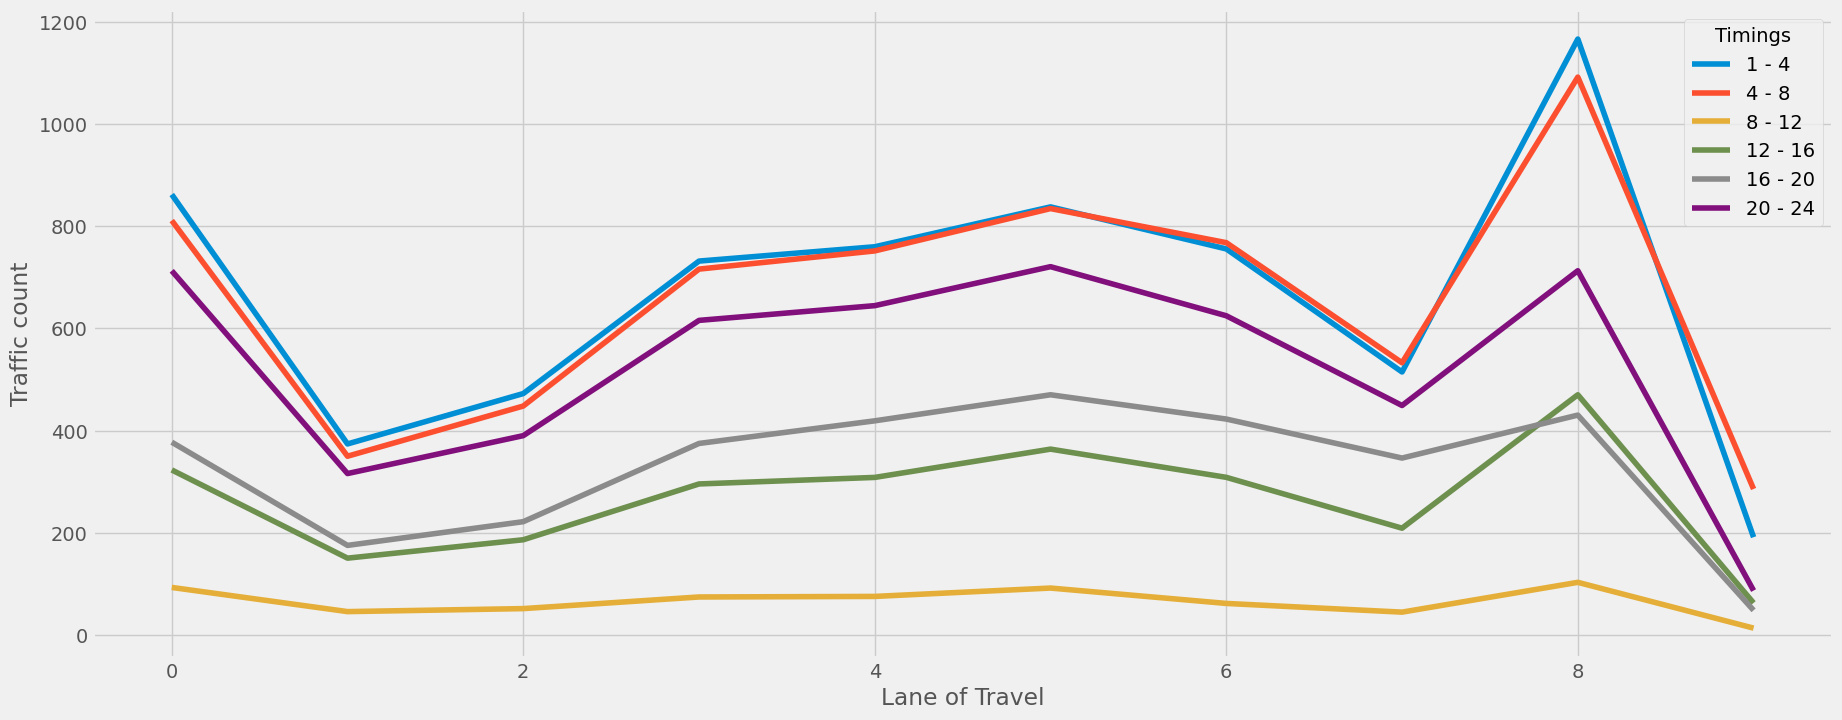

In [33]:
legends=['1 - 4','4 - 8', '8 - 12', '12 - 16', '16 - 20', '20 - 24']
direction_EDA = pd.pivot_table(data=traffic_df, index=['lane_of_travel'], values=timings)
direction_EDA.plot(kind='line', figsize=(20,8), xlabel = 'Lane of Travel', ylabel = 'Traffic count')
plt.style.use('fivethirtyeight')
plt.legend(title='Timings', labels=legends)

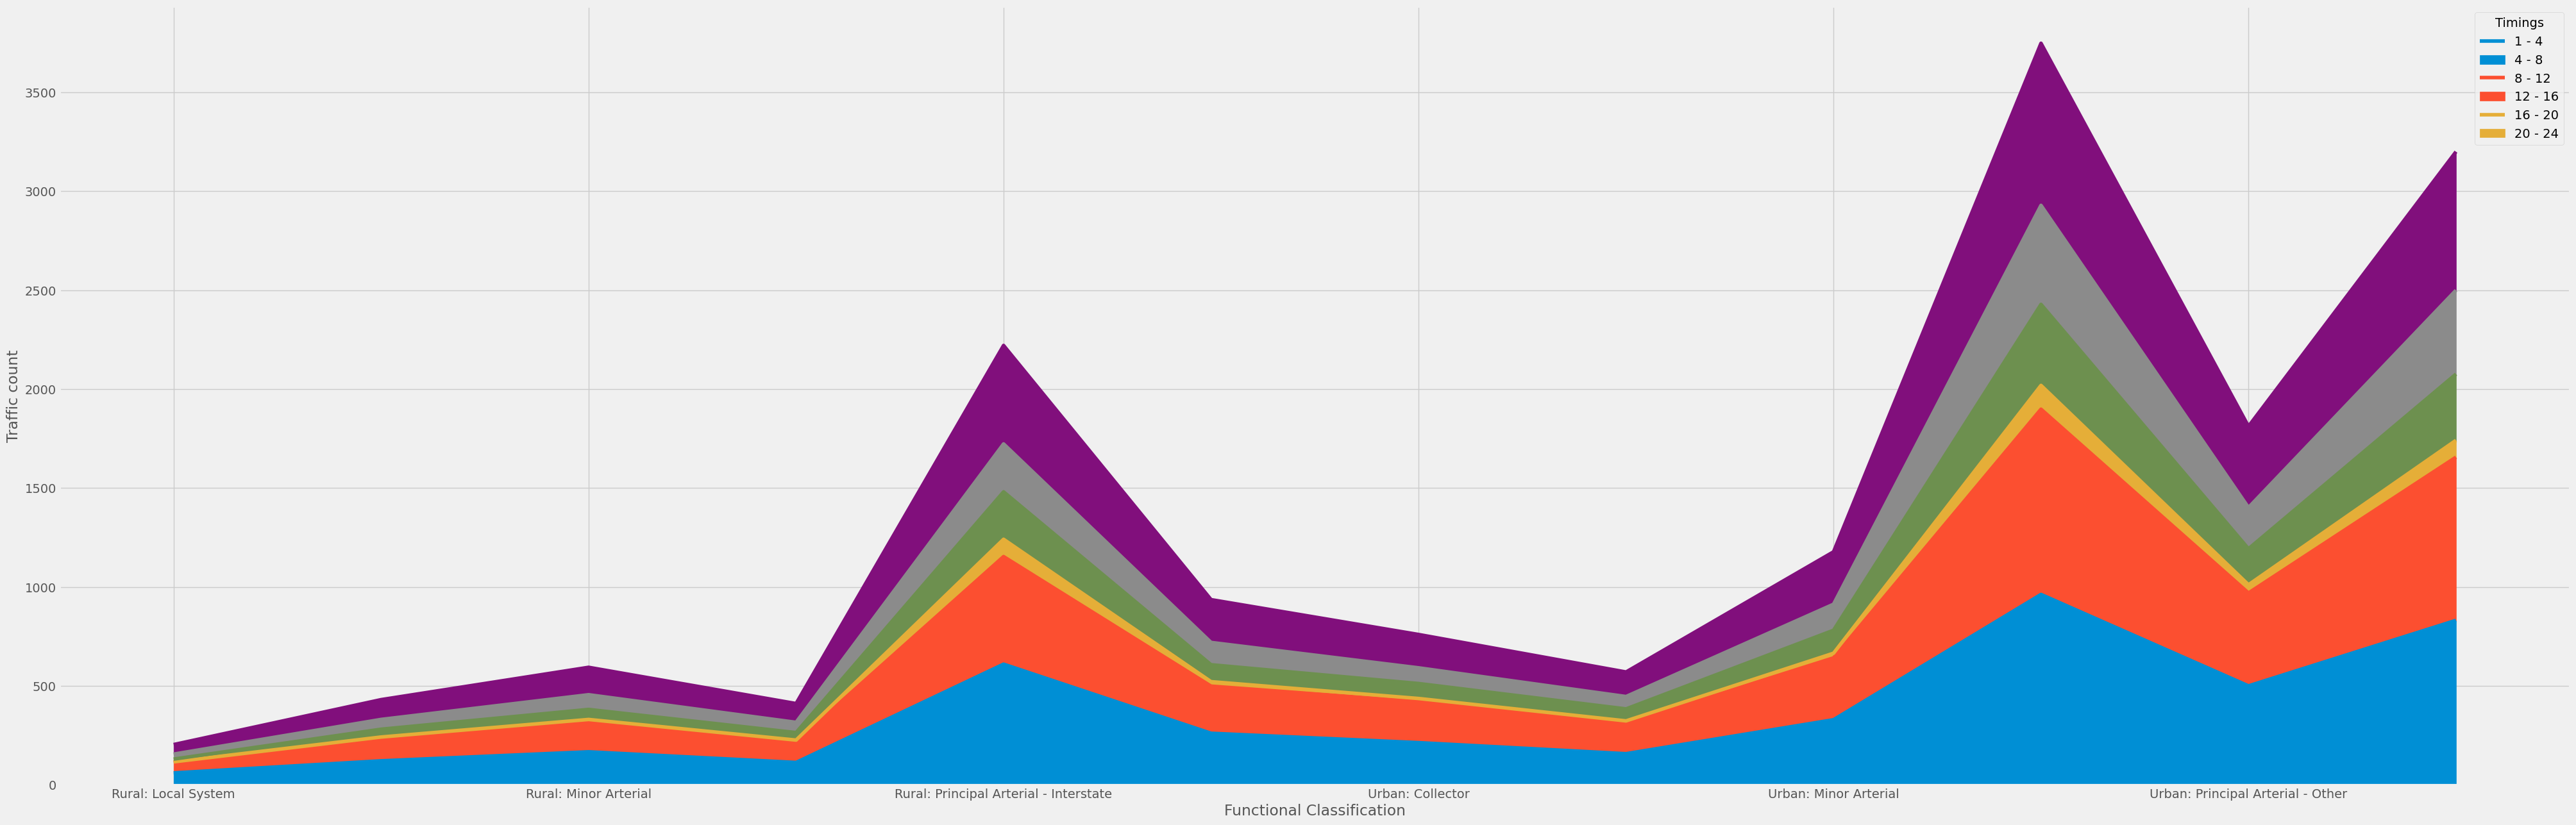

In [34]:
legends=['1 - 4','4 - 8', '8 - 12', '12 - 16', '16 - 20', '20 - 24']
direction_EDA = pd.pivot_table(data=traffic_df, index=['functional_classification_name'], values=timings)
direction_EDA.plot(kind='area', figsize=(45,15), xlabel = 'Functional Classification', ylabel = 'Traffic count')
plt.style.use('fivethirtyeight')
plt.legend(title='Timings', labels=legends)

In [35]:
traffic_df['station_id'].nunique()

5048

In this we are trying to convert station_id into the count of each station_id
since station_id is unique and we have **5048 unique station ID's** we had to perform this step so as to convert it into a feature.

In [36]:
# def integers(x):
#     ref = dict(traffic_df['station_id'].value_counts())
#     if ref.get(x):
#         return ref[x]

# traffic_df['station_id'] = traffic_df['station_id'].apply(integers)


# I initially tried to to the task using the above mentioned function but it was extremely slow while running and therefore had to look for a better alternative.
# For solving this issue i then used the map function and the proper for which i found the reference at the below mentioned link.
# https://stackoverflow.com/questions/41985566/pandas-replace-dictionary-slowness


station_id_element_count = dict(traffic_df['station_id'].value_counts())
traffic_df['station_id'] = traffic_df['station_id'].map(station_id_element_count.get)

We can now see in the below density graph that the station Id has been converted into the feature and can contribute in the accuracy of the dataset.

C:\Users\Talha\AppData\Local\Temp\ipykernel_3956\1662341746.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traffic_df['station_id'],color='blue')


<Axes: xlabel='station_id', ylabel='Density'>

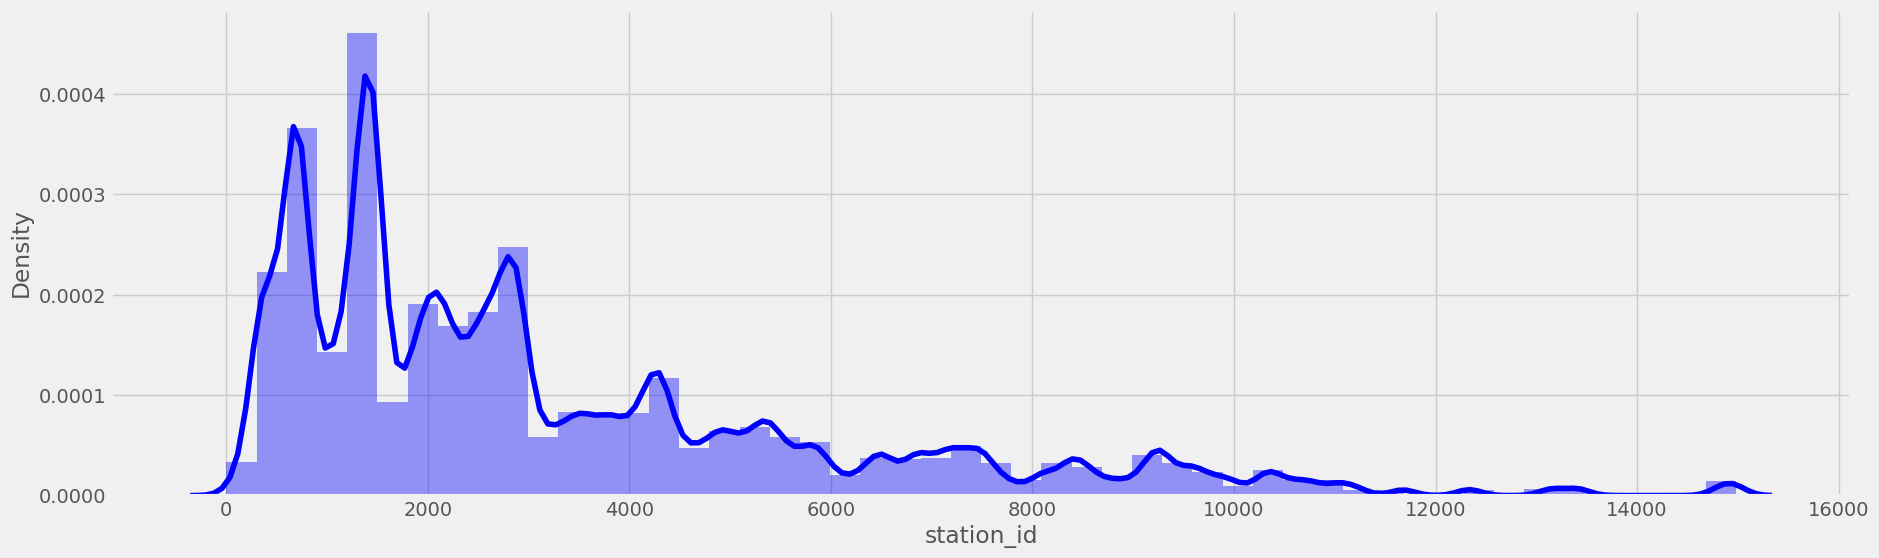

In [37]:
plt.figure(figsize=(20,6))
plt.figure(1)
sns.distplot(traffic_df['station_id'],color='blue')

In the below Code cell we have performed **One Hot Encoding** on the columns **direction_of_travel_name and functional_classification** so that we can convert their unique values into the feature and they can contribute to our final model.

In [38]:
# It is clear that '5U', '6R', '7U', '7R' functional_classification are very much less in number and therefore we can merge them all under one field.
# In the functional_classification column we can see they are categorical ones, so we make new feature out of them.

traffic_df['functional_classification'] = traffic_df['functional_classification'].replace(['5U', '6R', '7U', '7R'], 'other_functional_classifications')
traffic_df['functional_classification_name'] = traffic_df['functional_classification_name'].replace(['Urban: Collector', 
                                                                                                     'Rural: Minor Collector', 
                                                                                                     'Urban: Local System', 
                                                                                                     'Rural: Local System'], 'other_functional_classification_name')

functional_classification_dummy = pd.get_dummies(traffic_df['functional_classification'])

traffic_df = pd.concat([traffic_df, functional_classification_dummy], axis=1)


# In the direction_of_travel_name column we can see they are categorical ones, so we make new feature out of them.

direction_of_travel_name_dummy = pd.get_dummies(traffic_df['direction_of_travel_name'])

traffic_df = pd.concat([traffic_df, direction_of_travel_name_dummy], axis=1)

traffic_df.head()

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,...,East,North,Northeast,Northeast-Southwest,Northwest,South,Southeast,Southeast-Northwest,Southwest,West
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,...,False,True,False,False,False,False,False,False,False,False
1,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,9,...,False,False,False,False,False,False,False,False,False,True
3,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,4,...,False,False,False,False,False,True,False,False,False,False
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,...,True,False,False,False,False,False,False,False,False,False
6,2015-09-10,10,5,3,East,19,3U,Urban: Principal Arterial - Other,2,9,...,True,False,False,False,False,False,False,False,False,False


With the below mentioned Area graph between **Station ID and Lane of Travel** We can conclude that:

- The Reason for Maximum Traffic on the Lane number 7 and Lane number 8 was because **There are more number of stationed located on that path** and because of that people Travel more across those lanes.

**More Proof for Pattern 3**

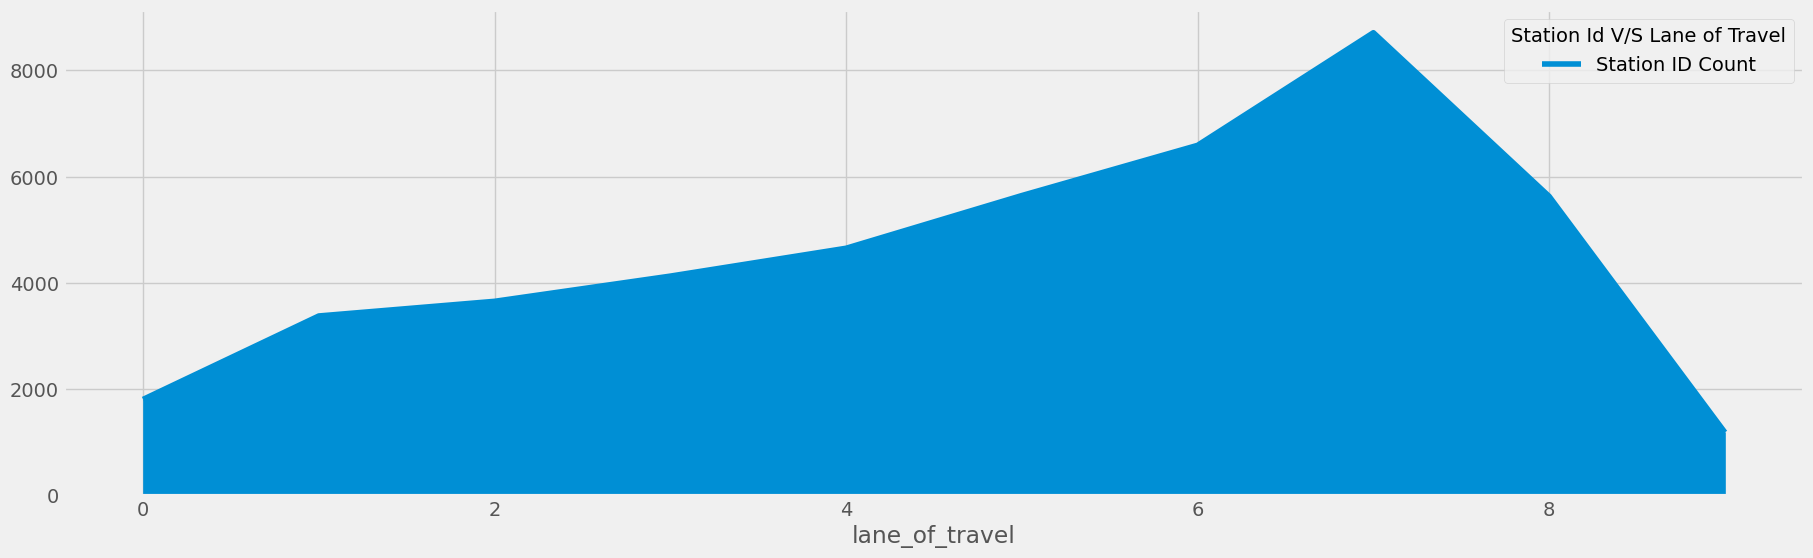

In [40]:
timings=['1_to_4','5_to_8', '9_to_12', '13_to_16', '17_to_20', '21_to_24']
lane_station = pd.pivot_table(traffic_df, index=['lane_of_travel'], values =['station_id'])
plt.style.use('fivethirtyeight')
lane_station.plot(kind='area', figsize=(20, 6));

plt.legend(title='Station Id V/S Lane of Travel', labels=['Station ID Count'])

## **Pattern 5**

From the below mentioned Bar Chart between **Functional Classification and Lane numbers** we can Conclude that:

- Most number of people from **Rural Areas travel mostly on Outer Lanes** (i.e. 5, 6, 7, 8, 9) instead of main Lanes. Infact we can clearly see that There are almost negligible people from Urban Areas travelling in outer lanes except of lane 8 as there as most number of stationes situated in that lane.

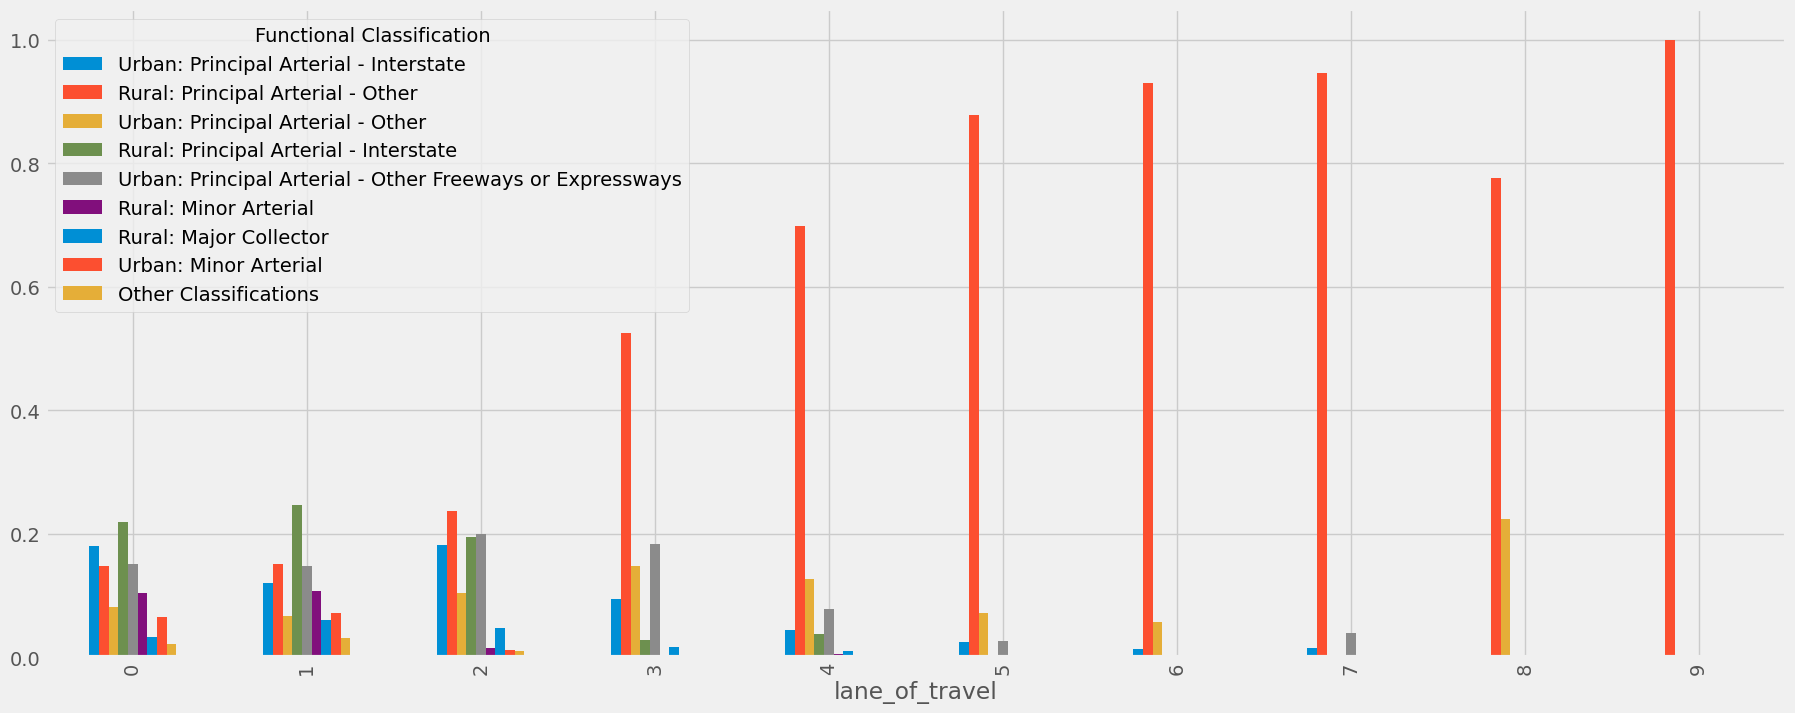

In [41]:
funtional_class = ['1U', '3R', '3U', '1R', '2U', '4R', '5R', '4U', 'other_functional_classifications']
lane_functional = pd.pivot_table(traffic_df, index=['lane_of_travel'], values =funtional_class)
plt.style.use('fivethirtyeight')
lane_functional.plot(kind='bar', figsize=(20, 8));
legends=['Urban: Principal Arterial - Interstate', 'Rural: Principal Arterial - Other', 'Urban: Principal Arterial - Other',
         'Rural: Principal Arterial - Interstate', 'Urban: Principal Arterial - Other Freeways or Expressways', 
         'Rural: Minor Arterial', 'Rural: Major Collector', 'Urban: Minor Arterial', 'Other Classifications']
plt.legend(title='Functional Classification', labels=legends)

We can further solidify our above mentioned argument that **Most amount traffic occurs in Urban: Principal Arterial - Interstate Area in hours 13 to 16 and 17 to 20 i.e. in Evening time mostly**.

**More Proof for Pattern 5**

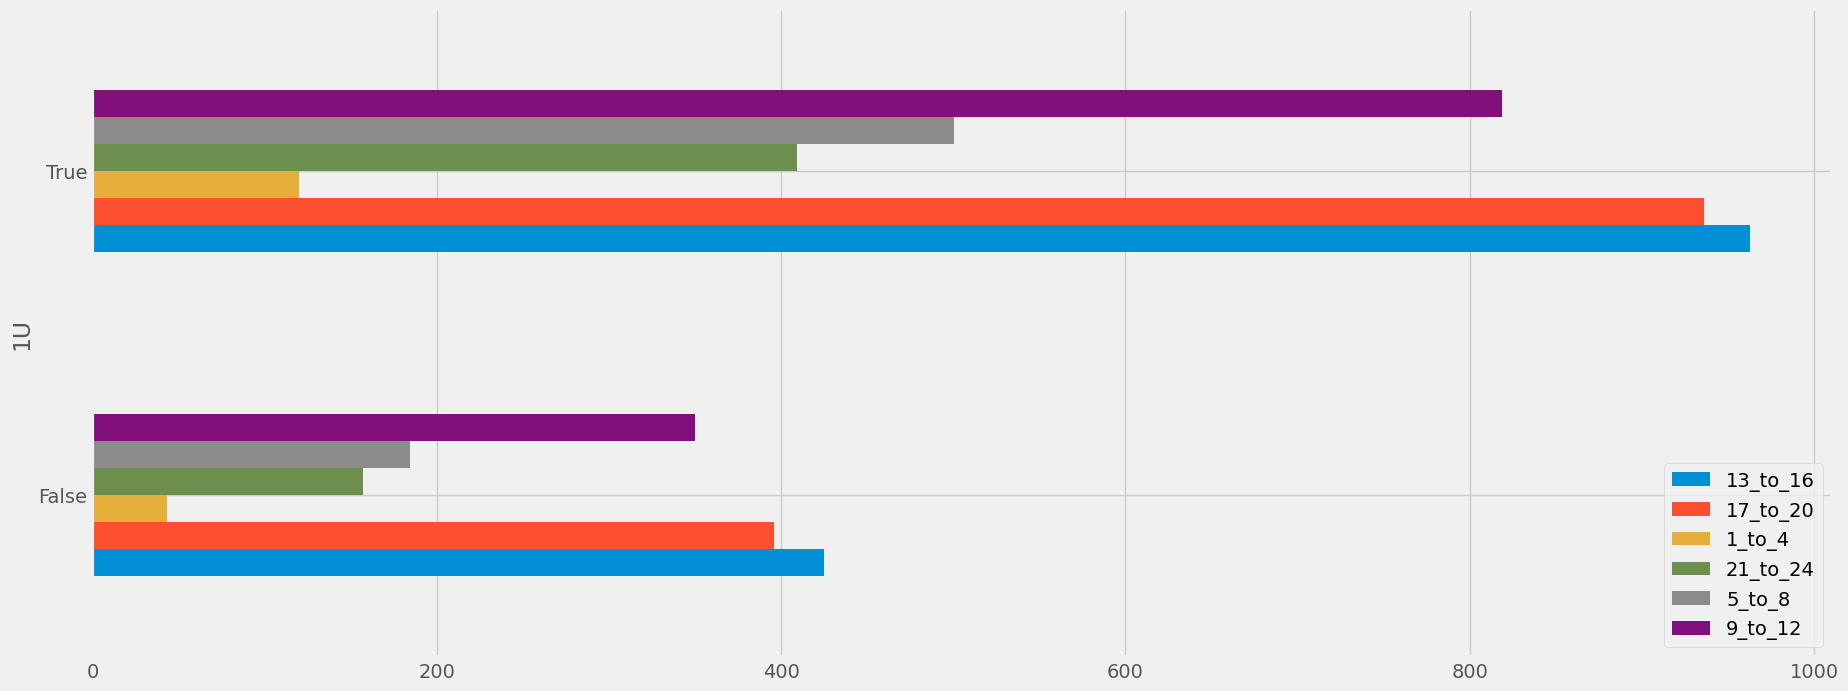

In [42]:
time_rural = pd.pivot_table(traffic_df, index=['1U'], values =timings)
plt.style.use('fivethirtyeight')
time_rural.plot(kind='barh', figsize=(20, 8));

In [43]:
traffic_df.head()

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,...,East,North,Northeast,Northeast-Southwest,Northwest,South,Southeast,Southeast-Northwest,Southwest,West
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,...,False,True,False,False,False,False,False,False,False,False
1,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,9,...,False,False,False,False,False,False,False,False,False,True
3,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,4,...,False,False,False,False,False,True,False,False,False,False
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,...,True,False,False,False,False,False,False,False,False,False
6,2015-09-10,10,5,3,East,19,3U,Urban: Principal Arterial - Other,2,9,...,True,False,False,False,False,False,False,False,False,False


In [44]:
traffic_df.describe()

,date,day_of_data,day_of_week,direction_of_travel,fips_state_code,lane_of_travel,month_of_data,station_id,1_to_4,5_to_8,9_to_12,13_to_16,17_to_20,21_to_24
count,6901954,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06,6.901954e+06
mean,2015-07-01 19:04:37.141342208,1.572624e+01,4.012449e+00,3.885063e+00,2.985262e+01,1.335427e+00,6.518998e+00,3.242214e+03,6.073193e+01,2.552298e+02,4.552350e+02,5.455916e+02,5.171385e+02,2.138846e+02
min,2015-01-01 00:00:00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,2015-04-02 00:00:00,8.000000e+00,2.000000e+00,1.000000e+00,1.300000e+01,1.000000e+00,4.000000e+00,1.300000e+03,9.000000e+00,4.700000e+01,1.282500e+02,1.640000e+02,1.435000e+02,4.500000e+01
50%,2015-07-01 00:00:00,1.600000e+01,4.000000e+00,5.000000e+00,3.000000e+01,1.000000e+00,7.000000e+00,2.367000e+03,2.700000e+01,1.355000e+02,3.105000e+02,3.905000e+02,3.545000e+02,1.267500e+02
75%,2015-10-02 00:00:00,2.300000e+01,6.000000e+00,5.000000e+00,4.400000e+01,2.000000e+00,1.000000e+01,4.355000e+03,7.975000e+01,3.357500e+02,6.277500e+02,7.545000e+02,7.207500e+02,2.940000e+02
max,2015-12-31 00:00:00,3.100000e+01,7.000000e+00,9.000000e+00,5.600000e+01,9.000000e+00,1.200000e+01,1.497900e+04,7.455000e+02,2.299750e+03,3.270500e+03,3.805000e+03,3.781250e+03,2.383750e+03
std,NaN,8.770013e+00,2.000232e+00,2.281844e+00,1.657622e+01,1.071629e+00,3.456660e+00,2.796729e+03,8.323963e+01,3.154451e+02,4.602179e+02,5.339154e+02,5.242792e+02,2.468112e+02


# **EDA - STATION DATA**

In [45]:
traffic_station_df.head()

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,...,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
0,NaN,NaN,NaN,NaN,13,3,7,West,59,6,...,N,Station not used for Heavy Vehicle Travel Info...,N,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,0,97
1,NaN,NaN,NaN,NaN,13,3,5,South,77,6,...,N,Station not used for Heavy Vehicle Travel Info...,N,100190,LITTLE JOHN CREEK SJ9912.526,L,Inductance loop,15,0,97
2,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,1,North,93,6,...,H,Station used for Heavy Vehicle Travel Informat...,N,022940,EDGEWOOD SIS5R22.999,P,Piezoelectric,15,0,69
3,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,5,South,35,49,...,N,Station not used for Heavy Vehicle Travel Info...,NaN,000302,I 15 12900 South M.P. 290.6,X,Radio wave,15,0,11
4,G,Axle spacing with Scheme F modified,0,NaN,14,1,7,West,27,34,...,N,Station not used for Heavy Vehicle Travel Info...,NaN,W01136,E. of Franklin Rd Underpass,L,Inductance loop,15,0,95


In [46]:
print('calibration of weighing system:'.upper())
print(dict(traffic_station_df['calibration_of_weighing_system'].value_counts()), end = '\n\n')
print('calibration of weighing system name:'.upper())
print(dict(traffic_station_df['calibration_of_weighing_system_name'].value_counts()), end = '\n\n')

print('algorithm_of_vehicle_classification:'.upper())
print(dict(traffic_station_df['algorithm_of_vehicle_classification'].value_counts()), end = '\n\n')
print('algorithm_of_vehicle_classification_name:'.upper())
print(dict(traffic_station_df['algorithm_of_vehicle_classification_name'].value_counts()), end = '\n\n')

CALIBRATION OF WEIGHING SYSTEM:
{'T': np.int64(1744), 'C': np.int64(1683), '0': np.int64(1455), 'M': np.int64(1347), 'Z': np.int64(799), 'U': np.int64(546), 'A': np.int64(439), 'D': np.int64(108), 'P': np.int64(10), 'B': np.int64(9), '2': np.int64(8), 'S': np.int64(6)}

CALIBRATION OF WEIGHING SYSTEM NAME:
{'Test trucks only': np.int64(1744), 'Combination of test trucks and trucks from the traffic stream (but not ASTM E1318)': np.int64(1683), 'Moving average of the steering axle of 3S2s': np.int64(1347), 'Other method': np.int64(799), 'Uncalibrated': np.int64(546), 'ASTM Standard E1318': np.int64(439), 'Other sample of trucks from the traffic stream': np.int64(108), 'Subset of ASTM Standard E1318': np.int64(9), 'Static calibration': np.int64(6)}

ALGORITHM_OF_VEHICLE_CLASSIFICATION:
{'F': np.int64(7100), 'G': np.int64(5148), 'D': np.int64(2256), '0': np.int64(1220), 'L': np.int64(1082), 'K': np.int64(548), 'Z': np.int64(465), 'M': np.int64(420), 'N': np.int64(116), 'H': np.int64(98), '

In the below code cell we are performing **One Hot Encoding** to convert many useless columns into features.

In [47]:
# It is clear that 'D', 'P', 'B', '2', 'S' calibration_of_weighing_system are very much less in number and therefore we can merge them all under one field.
# In the calibration_of_weighing_system column we can see they are categorical ones, so we make new feature out of them.

traffic_station_df['calibration_of_weighing_system'] = traffic_station_df['calibration_of_weighing_system'].replace(['D', 'P', 'B', '2', 'S'], 'other_calibration_of_weighing_system')

calibration_of_weighing_system_dummy = pd.get_dummies(traffic_station_df['calibration_of_weighing_system'])

traffic_station_df = pd.concat([traffic_station_df, calibration_of_weighing_system_dummy], axis=1)


# It is clear that 'Z', 'M', 'N', 'H', 'C', 'A', '1', 'E' algorithm_of_vehicle_classification are very much less in number and therefore we can merge them all under one field.
# In the algorithm_of_vehicle_classification column we can see they are categorical ones, so we make new feature out of them.

traffic_station_df['algorithm_of_vehicle_classification'] = traffic_station_df['algorithm_of_vehicle_classification'].replace(['Z', 'M', 'N', 'H', 'C', 'A', '1', 'E'], 'other_algorithm_of_vehicle_classification')
traffic_station_df['algorithm_of_vehicle_classification'] = traffic_station_df['algorithm_of_vehicle_classification'].replace(['0'], 'A_0')

algorithm_of_vehicle_classification_dummy = pd.get_dummies(traffic_station_df['algorithm_of_vehicle_classification'])

traffic_station_df = pd.concat([traffic_station_df, algorithm_of_vehicle_classification_dummy], axis=1)

# Renaming the very long column name.

traffic_station_df["direction_of_travel_name"].replace({"North-South or Northeast-Southwest combined (ATR stations only)": "Northeast-Southwest", 
                                                "East-West or Southeast-Northwest combined (ATR stations only)": "Southeast-Northwest"}, inplace=True)

# In the direction_of_travel_name column we can see they are categorical ones, so we make new feature out of them.

direction_of_travel_name_dummy1 = pd.get_dummies(traffic_station_df['direction_of_travel_name'])

traffic_station_df = pd.concat([traffic_station_df, direction_of_travel_name_dummy1], axis=1)


# It is clear that '5U', '6R', '7U', '7R' functional_classification are very much less in number and therefore we can merge them all under one field.
# In the functional_classification column we can see they are categorical ones, so we make new feature out of them.

traffic_station_df['functional_classification'] = traffic_station_df['functional_classification'].replace(['5U', '6R', '7U', '7R'], 'other_functional_classifications')
traffic_station_df['functional_classification_name'] = traffic_station_df['functional_classification_name'].replace(['Urban: Collector', 
                                                                                                     'Rural: Minor Collector', 
                                                                                                     'Urban: Local System', 
                                                                                                     'Rural: Local System'], 'other_functional_classification_name')

functional_classification_dummy1 = pd.get_dummies(traffic_station_df['functional_classification'])

traffic_station_df = pd.concat([traffic_station_df, functional_classification_dummy1], axis=1)


# In the lane_of_travel_name column we can see they are categorical ones, so we make new feature out of them.

traffic_station_df['lane_of_travel_name'] = traffic_station_df['lane_of_travel_name'].replace(['Outside (rightmost) lane'], 'Outside_rightmost_lane')
traffic_station_df['lane_of_travel_name'] = traffic_station_df['lane_of_travel_name'].replace(['Data with lanes combined'], 'Data_with_lanes_combined')
traffic_station_df['lane_of_travel_name'] = traffic_station_df['lane_of_travel_name'].replace(['Other lanes'], 'Other_lanes')

lane_of_travel_name_dummy = pd.get_dummies(traffic_station_df['lane_of_travel_name'])

traffic_station_df = pd.concat([traffic_station_df, lane_of_travel_name_dummy], axis=1)


# In the method_of_traffic_volume_counting_name column we can see they are categorical ones, so we make new feature out of them.


traffic_station_df.replace({'method_of_traffic_volume_counting_name' : { 'Permanent automatic traffic recorder (ATR)' : 'TVC_Automatic', 
                                                               'Portable traffic recording device' : 'TVC_Portable',
                                                                'Human observation (manual)': 'TVC_Manual'}}, inplace=True)

method_of_traffic_volume_counting_name_dummy = pd.get_dummies(traffic_station_df['method_of_traffic_volume_counting_name'])

traffic_station_df = pd.concat([traffic_station_df, method_of_traffic_volume_counting_name_dummy], axis=1)

traffic_station_df.head()

C:\Users\Talha\AppData\Local\Temp\ipykernel_3956\1033661676.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traffic_station_df["direction_of_travel_name"].replace({"North-South or Northeast-Southwest combined (ATR stations only)": "Northeast-Southwest",


,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,...,4R,4U,5R,other_functional_classifications,Data_with_lanes_combined,Other_lanes,Outside_rightmost_lane,TVC_Automatic,TVC_Manual,TVC_Portable
0,NaN,NaN,NaN,NaN,13,3,7,West,59,6,...,False,False,False,False,False,True,False,True,False,False
1,NaN,NaN,NaN,NaN,13,3,5,South,77,6,...,False,False,False,False,False,False,True,True,False,False
2,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,1,North,93,6,...,False,False,False,False,False,True,False,True,False,False
3,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,5,South,35,49,...,False,False,False,False,False,False,True,True,False,False
4,G,Axle spacing with Scheme F modified,0,NaN,14,1,7,West,27,34,...,False,False,False,False,False,True,False,False,False,True


In the below code cell we are converting the columns which contains only 2 values into vinary values on 1 and 0 so that they can be machine readable and can be used as a feature.

In [48]:
traffic_station_df.replace({'sample_type_for_traffic_volume_name' : {'Station used for Traffic Volume Trends': 1, 
                                                                     'Station not used for Traffic Volume Trends': 0}}, inplace=True)

traffic_station_df.replace({'sample_type_for_vehicle_classification_name' : {'Station used for Heavy Vehicle Travel Information System': 1, 
                                                                             'Station not used for Heavy Vehicle Travel Information System': 0}}, inplace=True)

traffic_station_df.replace({'method_of_data_retrieval_name' : { 'Automated (telemetry)' : 1, 'Not automated (manual)' : 0}}, inplace=True)

traffic_station_df.replace({'hpms_sample_type' : { 'N' : 1, 'Y' : 0}}, inplace=True)

traffic_station_df.replace({'national_highway_system' : { 'N' : 0, 'Y' : 1}}, inplace=True)

C:\Users\Talha\AppData\Local\Temp\ipykernel_3956\337208985.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  traffic_station_df.replace({'sample_type_for_traffic_volume_name' : {'Station used for Traffic Volume Trends': 1,
C:\Users\Talha\AppData\Local\Temp\ipykernel_3956\337208985.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  traffic_station_df.replace({'sample_type_for_vehicle_classification_name' : {'Station used for Heavy Vehicle Travel Information System': 1,
C:\Users\Talha\AppData\Local\Temp\ipykernel_3956\337208985.p

Here we are converting all the columns which contains many unique values into the counts of each value so that they all can be used as the feature and contribute into our model accuracy.

In [49]:
year_station_established_count = dict(traffic_station_df['year_station_established'].value_counts())
traffic_station_df['year_station_established'] = traffic_station_df['year_station_established'].map(year_station_established_count.get)

year_station_discontinued_count = dict(traffic_station_df['year_station_discontinued'].value_counts())
traffic_station_df['year_station_discontinued'] = traffic_station_df['year_station_discontinued'].map(year_station_discontinued_count.get)

station_id_element_count1 = dict(traffic_station_df['station_id'].value_counts())
traffic_station_df['station_id'] = traffic_station_df['station_id'].map(station_id_element_count1.get)

previous_station_id_count = dict(traffic_station_df['previous_station_id'].value_counts())
traffic_station_df['previous_station_id'] = traffic_station_df['previous_station_id'].map(previous_station_id_count.get)

posted_signed_route_number_count = dict(traffic_station_df['posted_signed_route_number'].value_counts())
traffic_station_df['posted_signed_route_number'] = traffic_station_df['posted_signed_route_number'].map(posted_signed_route_number_count.get)

Here we are dropping all the useless column and the columns we have already converted into the features.

In [50]:
traffic_station_df.drop(['calibration_of_weighing_system', 'calibration_of_weighing_system_name', 
                         'algorithm_of_vehicle_classification', 'algorithm_of_vehicle_classification_name',
                        'direction_of_travel_name', 'functional_classification','functional_classification_name', 'lane_of_travel_name',
                        'method_of_traffic_volume_counting_name', 'year_of_data', 'station_location', 'method_of_truck_weighing_name',
                        'record_type', 'sample_type_for_traffic_volume', 'sample_type_for_truck_weight_name',
                        'sample_type_for_truck_weight', 'sample_type_for_vehicle_classification', 'type_of_sensor_name',
                        'type_of_sensor', 'second_type_of_sensor', 'primary_purpose', 'primary_purpose_name', 
                        'method_of_vehicle_classification_name'], axis = 1, inplace=True)
traffic_station_df.reset_index(inplace=True, drop=True)

# **Training and Testing of Model**

In [51]:
# Removing the unnecesary columns and the columns with non numerical values.
traffic_df_m = traffic_df.drop(['date', 'direction_of_travel_name', 'functional_classification_name', 'functional_classification', 'fips_state_code'], axis = 1)

In [54]:
traffic_df_m.reset_index(inplace=True, drop=True)
traffic_df_m.head()

,day_of_data,day_of_week,direction_of_travel,lane_of_travel,month_of_data,station_id,1_to_4,5_to_8,9_to_12,13_to_16,...,East,North,Northeast,Northeast-Southwest,Northwest,South,Southeast,Southeast-Northwest,Southwest,West
0,7,3,1,1,4,3542,3.25,95.25,145.25,130.75,...,False,True,False,False,False,False,False,False,False,False
1,26,7,7,2,9,3267,261.25,425.00,1081.25,1457.25,...,False,False,False,False,False,False,False,False,False,True
2,26,1,5,1,4,424,78.00,202.75,755.25,1014.25,...,False,False,False,False,False,True,False,False,False,False
3,23,7,3,0,5,597,3.75,20.00,77.50,89.00,...,True,False,False,False,False,False,False,False,False,False
4,10,5,3,2,9,3428,38.00,291.75,402.00,518.00,...,True,False,False,False,False,False,False,False,False,False


Splitting our data into training and testing data.
Our target value of the model will be the lane of travel.

In [52]:

# Assuming traffic_df_m is your modified DataFrame
traffic_df_m.reset_index(inplace=True, drop=True)

# Save the DataFrame to a CSV file
traffic_df_m.to_csv('modified_traffic_data.csv', index=False)

# Optionally, you can print a confirmation message
print("DataFrame saved as 'modified_traffic_data.csv'")

DataFrame saved as 'modified_traffic_data.csv'


In [55]:
# Setting up our X and Y axis i.e. input(X axis) and output(Y axis) i.e. target value.
# Splitting out training data into new Train data and Validation data.

y = traffic_df_m['lane_of_travel']
X_train = traffic_df_m.drop(['lane_of_travel'], axis = 1)
Xtrain ,Xtest, ytrain, ytest = train_test_split(X_train, y, test_size = 0.2, random_state=0)

In [56]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []

## **Random Forest Model**

**The reason we chose this particular model for solving the problem was because of the accuracy and depth this model provides to my output.**

**The reason for choosing Lane of Travel as output of my model was because during Data Analysis phase, we observed a pattern in which most of the data had a similarity and good relation with Lane of Travel column and therefore it will provide us with high accuracy and consistency throughout the model.**

In [57]:
# Creating the RandomForest model with number of trees = 10 to get better performance.
# The reason i took less number of estimarors is because the data is too large and it will take 17 to 20 hours to just create this model otherwise.
# ALso if we take more estimators our model will Over-Fit which we want to avoid.

Algorithm.append('Random Forest Regressor')
RF_model = RandomForestRegressor(n_estimators=10)

# Fit the model with our training data.
RF_model.fit(Xtrain, ytrain)

RandomForestRegressor(n_estimators=10)

In [58]:
# Predicting the output using our trained model
Output = RF_model.predict(Xtest)

Checking the accuracy of the model.

As we can see our model have the **accuracy of 95.24%**

In [59]:
accuracy_train = round(RF_model.score(Xtest, ytest)*100,2)
print(round(accuracy_train,2),'%')

95.24 %


In [60]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(ytest, Output))
R2_Score.append(r2_score(ytest, Output))

## **DATA MODEL**

In [63]:
train_features = Xtrain
col = Xtrain.columns
feature_list = col.tolist()
train_labels = ytrain

In [62]:
col 


Index(['day_of_data', 'day_of_week', 'direction_of_travel', 'month_of_data',
       'station_id', '1_to_4', '5_to_8', '9_to_12', '13_to_16', '17_to_20',
       '21_to_24', '1R', '1U', '2U', '3R', '3U', '4R', '4U', '5R',
       'other_functional_classifications', 'East', 'North', 'Northeast',
       'Northeast-Southwest', 'Northwest', 'South', 'Southeast',
       'Southeast-Northwest', 'Southwest', 'West'],
      dtype='object')

In [64]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)

RandomForestRegressor(max_depth=3, n_estimators=10)

**In the below cell we can see the Data Model of the complete Project and the final model.**

In [57]:
# # Extract the small tree
# tree_small = rf_small.estimators_[5]

# # Save the tree as a png image
# tree.export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# (graph, ) = pydot.graph_from_dot_file('small_tree.dot')
# graph.write_png('small_tree.png');
# Source.from_file("small_tree.dot")

In [67]:
# In the below function we are taking user input of the time slot in the they want to travel and then we are assigning it to the appropriate time slot so that we can
# find the optimal route for them.

timings=['1_to_4','5_to_8', '9_to_12', '13_to_16', '17_to_20', '21_to_24']
time_ranges = [(0,4), (5,8), (9, 12), (13, 16), (17, 20), (21,24)]
print("Please input your desired travelling time in 24-Hours format (example: 11, 12, 13, 14) : ")
user_time  = int(input())
usertime = 2
for i in range(len(time_ranges)):
  start, end = time_ranges[i]
  if start <= user_time <= end:
    usertime = timings[i]
    break

Please input your desired travelling time in 24-Hours format (example: 11, 12, 13, 14) : 


With be help of below graph we can Clearly say that User should avoid taking Inner lanes and try to use outer lanes as much as possible and also take directions North, Northwest, Southeast-Northwest, Southeast, Northeast-southwest and Northeast.

C:\Users\Talha\AppData\Local\Temp\ipykernel_1644\1787443325.py:1: FutureWarning: The provided callable <function sum at 0x00000225142456C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(traffic_df, values=[usertime], index=['lane_of_travel'],


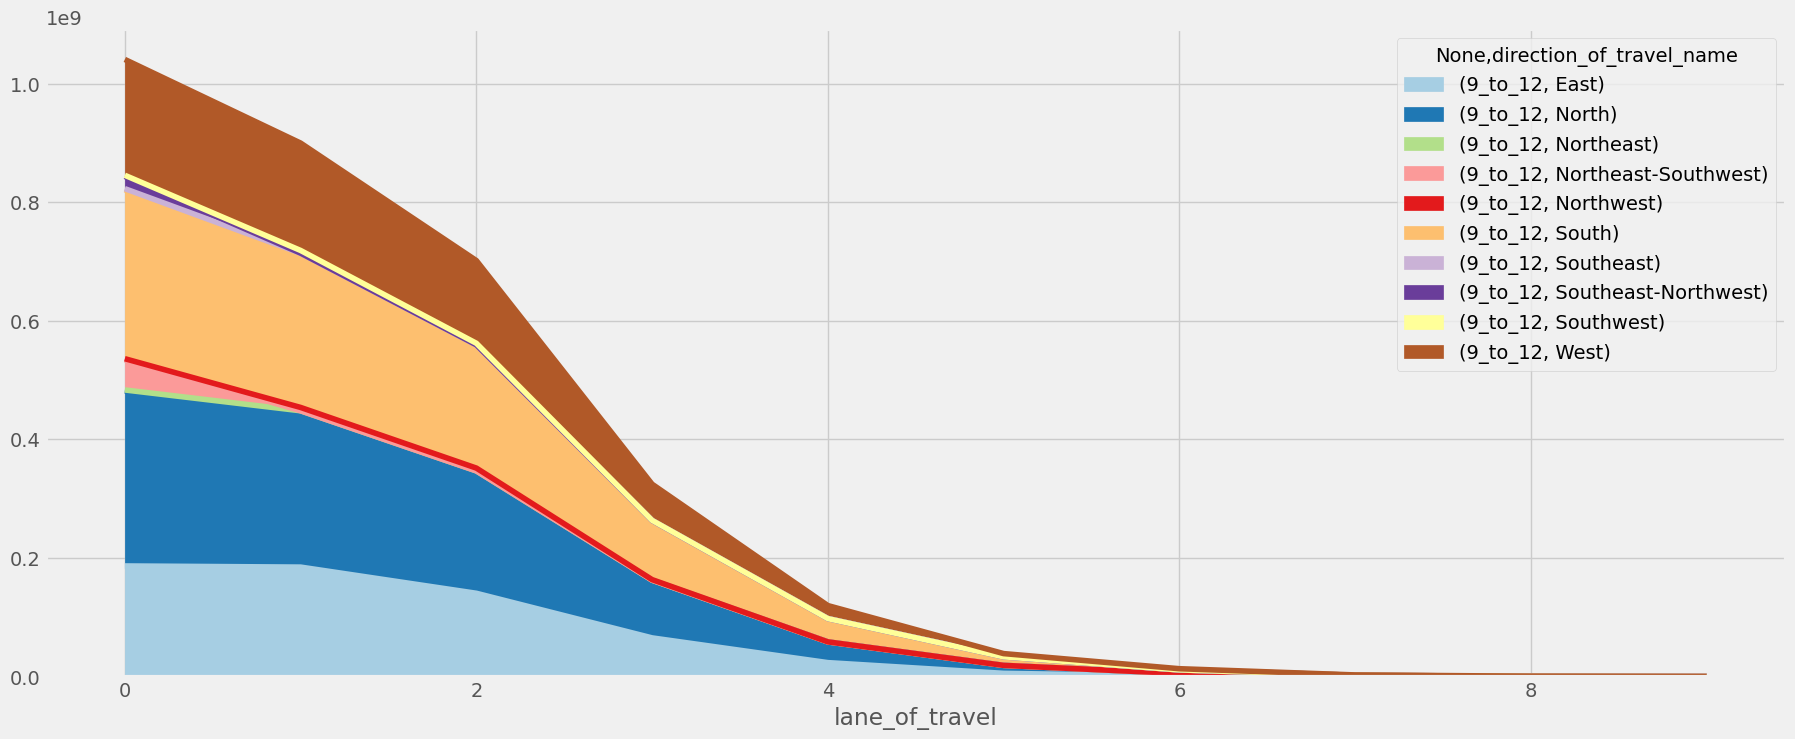

In [68]:
table = pd.pivot_table(traffic_df, values=[usertime], index=['lane_of_travel'],
                    columns=['direction_of_travel_name'], aggfunc=np.sum, fill_value=0)
plt.style.use('fivethirtyeight')
table.plot(kind='area', figsize=(20, 8), colormap='Paired');

## **Score Card of the Models' Performances**

In [69]:
import pandas as pd 

In [70]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score*100, R2_Score*100)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])
Comparison

,Algorithm,MSE_Score,R2_Score
0,Random Forest Regressor,0.05462,0.952397


## **Exporting the Model**

In [71]:
# Exporting the model

import pickle

Pkl_Filename = "Final_model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(RF_model, file)